In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Company_data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
df1=df.copy()

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df1.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df1.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Advertising'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>, <AxesSubplot:>]],
      dtype=object)

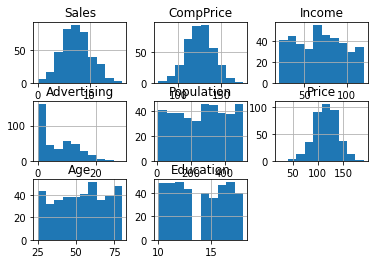

In [7]:
df1.hist()

C:\Users\Avanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


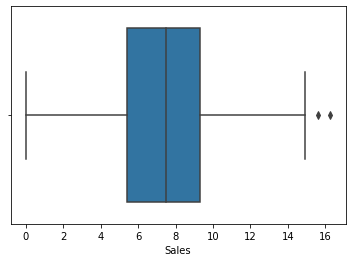

In [8]:
#Our target variable is Sales.
ax=sns.boxplot(df1['Sales'])

In [9]:
#There are two outliers.

In [10]:
# We have to apply random forest to know about attributes causing high sales.

In [11]:
df1=pd.get_dummies(df1,columns=['ShelveLoc','Urban','US'])
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [12]:
# We will convert our target variable'Sales' into categorical variable.

In [13]:
df1.mean()

Sales                 7.496325
CompPrice           124.975000
Income               68.657500
Advertising           6.635000
Population          264.840000
Price               115.795000
Age                  53.322500
Education            13.900000
ShelveLoc_Bad         0.240000
ShelveLoc_Good        0.212500
ShelveLoc_Medium      0.547500
Urban_No              0.295000
Urban_Yes             0.705000
US_No                 0.355000
US_Yes                0.645000
dtype: float64

In [14]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [15]:
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,large
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,small
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,small
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,small


In [16]:
df1.isna().sum()

CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Good      0
ShelveLoc_Medium    0
Urban_No            0
Urban_Yes           0
US_No               0
US_Yes              0
sales               0
dtype: int64

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CompPrice         400 non-null    int64 
 1   Income            400 non-null    int64 
 2   Advertising       400 non-null    int64 
 3   Population        400 non-null    int64 
 4   Price             400 non-null    int64 
 5   Age               400 non-null    int64 
 6   Education         400 non-null    int64 
 7   ShelveLoc_Bad     400 non-null    uint8 
 8   ShelveLoc_Good    400 non-null    uint8 
 9   ShelveLoc_Medium  400 non-null    uint8 
 10  Urban_No          400 non-null    uint8 
 11  Urban_Yes         400 non-null    uint8 
 12  US_No             400 non-null    uint8 
 13  US_Yes            400 non-null    uint8 
 14  sales             400 non-null    object
dtypes: int64(7), object(1), uint8(7)
memory usage: 27.9+ KB


In [18]:
# Random Forest classification.
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [19]:
array=df1.values
x=array[:,0:13]
y=array[:,14]

In [20]:
num_trees=100
max_features=3
kfold=KFold(n_splits=10)
model1=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
result1=cross_val_score(model1,x,y,cv=kfold)
print(result1.mean())

0.8075000000000001


In [21]:
result1

array([0.825, 0.875, 0.65 , 0.85 , 0.775, 0.9  , 0.8  , 0.8  , 0.775,
       0.825])

In [22]:
# By using random forest,we have got accuracy of 80%.

In [23]:
# Let's try out the bagging, Adaboost technique.

In [24]:
#Bagged decision trees for classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
array=df1.values
x=array[:,0:13]
y=array[:,14]
seed=7
kfold=KFold(n_splits=10)
cart=DecisionTreeClassifier()
num_trees=100
model2=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=seed)
result2=cross_val_score(model2,x,y,cv=kfold)
print(result2.mean())

0.805


In [25]:
result2

array([0.85 , 0.875, 0.675, 0.875, 0.8  , 0.825, 0.75 , 0.75 , 0.775,
       0.875])

In [26]:
# Adaboost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [27]:
array=df1.values
x=array[:,0:13]
y=array[:,14]
seed=7
num_trees=100
kfold=KFold(n_splits=10)
model3=AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
result3=cross_val_score(model3,x,y,cv=kfold)
print(result3.mean())

0.8300000000000001


In [28]:
# With Adaboost the accuracy seems to be increasing.

In [29]:
# Let's also try XGboost and light GBM.

In [40]:
!pip install xgboost

In [41]:
!pip install lightgbm

In [30]:
# XG boost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas import read_csv

In [31]:
df3=df1.copy()

In [32]:
df3

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,large
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,small
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,small
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,small


In [33]:
df3.loc[df3['sales']=='small','SALES']=0
df3.loc[df3['sales']=='large','SALES']=1

In [34]:
df3

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales,SALES
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,large,1.0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,large,1.0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,large,1.0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,small,0.0
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,small,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,large,1.0
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,small,0.0
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,small,0.0
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,small,0.0


In [35]:
del df3['sales']

In [36]:
df3

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,SALES
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1.0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1.0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1.0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0.0
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,1.0
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,0.0
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,0.0
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,0.0


In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CompPrice         400 non-null    int64  
 1   Income            400 non-null    int64  
 2   Advertising       400 non-null    int64  
 3   Population        400 non-null    int64  
 4   Price             400 non-null    int64  
 5   Age               400 non-null    int64  
 6   Education         400 non-null    int64  
 7   ShelveLoc_Bad     400 non-null    uint8  
 8   ShelveLoc_Good    400 non-null    uint8  
 9   ShelveLoc_Medium  400 non-null    uint8  
 10  Urban_No          400 non-null    uint8  
 11  Urban_Yes         400 non-null    uint8  
 12  US_No             400 non-null    uint8  
 13  US_Yes            400 non-null    uint8  
 14  SALES             400 non-null    float64
dtypes: float64(1), int64(7), uint8(7)
memory usage: 27.9 KB


In [38]:
array=df3.values
x=array[:,0:13]
y=array[:,14]
seed=7
test_size=0.33
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_size,random_state=seed)
import time
st=time.time()
model4=XGBClassifier(n_estimators=100)
model4.fit(x_train,y_train)
end=time.time()
print('Time taken to train XGB model',end-st)

Time taken to train XGB model 1.016568660736084


In [39]:
# make predictions for test data
y_pred = model4.predict(x_test)
predictions = [round(value) for value in y_pred]


In [40]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.55%


In [42]:
#light GBM

In [43]:
import lightgbm as lgb
d_train=lgb.Dataset(x_train,label=y_train)

In [44]:
d_train

In [45]:
params = {}
params['learning_rate'] = 0.002 #,0.1,0.3
params['boosting_type'] = 'gbdt' # dart
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [46]:
st = time.time()
clf = lgb.train(params, d_train, 100)
end = time.time()
print('time taken to train Light XGB model', end-st)

[LightGBM] [Info] Number of positive: 137, number of negative: 131
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 268, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511194 -> initscore=0.044784
[LightGBM] [Info] Start training from score 0.044784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [48]:
#Prediction
y_pred=clf.predict(x_test)

In [50]:
predictions1= [round(value) for value in y_pred]

In [51]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions1)
accuracy

0.6742424242424242